In [9]:
import pandas as pd
import numpy as np
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

In [10]:
df = pd.read_csv("./cc1.csv")
df.head()

,column_a,time,v1,v2,v3,v4,v5,v6,v7,v8,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


False 284315
True 492
Proportion: 577.88 : 1


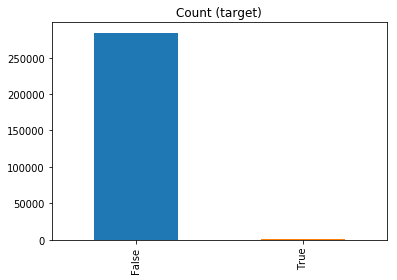

In [38]:
target_count = df['class'].value_counts()
print('False', target_count[0])
print('True', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [39]:
print(df.shape)
print(list(df.columns))

(284807, 32)
['column_a', 'time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'class']


In [40]:
X_under = df[['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13',
              'v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v28','amount']]
y_under = df['class']

In [42]:
# Class count
count_class_0, count_class_1 =  df['class'].value_counts()

# Divide by class
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]

Random under-sampling:
True     492
False    492
Name: class, dtype: int64


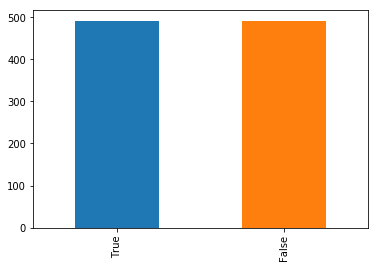

In [44]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['class'].value_counts())

df_test_under['class'].value_counts().plot(kind='bar');

In [46]:
df_test_under

,column_a,time,v1,v2,v3,v4,v5,v6,v7,v8,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
53422,53423,45970,1.238007,0.275136,0.183792,0.502698,-0.180847,-0.568254,-0.045679,-0.017648,...,-0.261640,-0.803125,0.080877,-0.045562,0.219521,0.098459,-0.029202,0.016486,0.89,False
236625,236626,148887,-0.106930,1.244002,-0.010788,0.955654,0.865710,-0.821168,1.354914,-0.234610,...,0.095845,0.578328,-0.300715,-0.090726,0.002142,-0.367495,0.435829,0.240035,4.60,False
237577,237578,149304,0.571605,0.534697,-2.024790,1.448949,3.735773,-2.129051,-2.612045,-3.124568,...,-0.756030,1.371611,-4.346001,0.912884,-1.210741,-0.413308,0.531517,0.596501,30.00,False
140172,140173,83579,1.297027,0.122938,-0.212699,0.046763,0.626905,0.796102,-0.141145,0.178137,...,-0.289430,-0.817052,-0.062277,-1.709709,0.352885,0.213276,-0.017092,-0.011696,1.29,False
29419,29420,35464,-2.451974,-1.311091,1.107798,2.103070,-4.138824,3.611161,4.994758,-0.622580,...,-0.036160,0.540461,0.275251,0.101762,0.783555,0.117978,0.360813,-0.508283,1235.87,False
49883,49884,44251,1.460129,-0.742574,0.132393,-1.323821,-1.055128,-1.002990,-0.440381,-0.343230,...,-0.435084,-0.839835,0.197233,0.375290,0.264089,-0.445354,0.026662,0.020107,24.98,False
127675,127676,78422,-3.022457,2.407968,-0.550659,-0.998077,-1.208227,-1.012615,-0.814636,2.035729,...,0.143850,-0.435600,0.206038,0.035164,-0.080609,-0.166124,-0.870111,-0.183918,7.85,False
254310,254311,156672,2.023705,-0.232196,-1.466523,0.159484,0.323739,-0.243766,0.031351,-0.046706,...,-0.225387,-0.614137,0.253199,0.348866,-0.180808,0.246191,-0.089469,-0.068633,19.33,False
62063,62064,50108,-1.853398,-0.824220,0.448724,-2.010720,4.088676,2.233548,-0.513741,1.022909,...,-0.148673,-1.205301,0.060467,0.967176,0.551785,-0.026835,-0.105826,0.071660,10.99,False
72375,72376,54682,-0.645878,0.901068,1.943420,-0.357289,0.079879,-0.835336,0.764940,-0.014278,...,-0.102653,-0.363072,0.032961,0.587547,-0.363235,-0.060948,0.062182,0.113475,1.29,False


In [45]:
df['class'].dtype

dtype('bool')

In [50]:
X_under = df_test_under[['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13',
              'v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v28','amount']]
y_under = df_test_under['class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

In [53]:
from tpot import TPOTClassifier

In [54]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_under_train ,  y_under_train)  
print(tpot.score(X_under_test, y_under_test))

Generation 1 - Current best internal CV score: 0.9462392891145669
Generation 2 - Current best internal CV score: 0.9462604464191262
Generation 3 - Current best internal CV score: 0.9462604464191262
Generation 4 - Current best internal CV score: 0.9462604464191262
Generation 5 - Current best internal CV score: 0.9462604464191262

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=3, min_samples_split=13, n_estimators=100)
0.9391891891891891
